## Outliers

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize = (14, 6))

In [21]:
dados = pd.read_csv('data/aluguel_amostra.csv', sep = ';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


<AxesSubplot: >

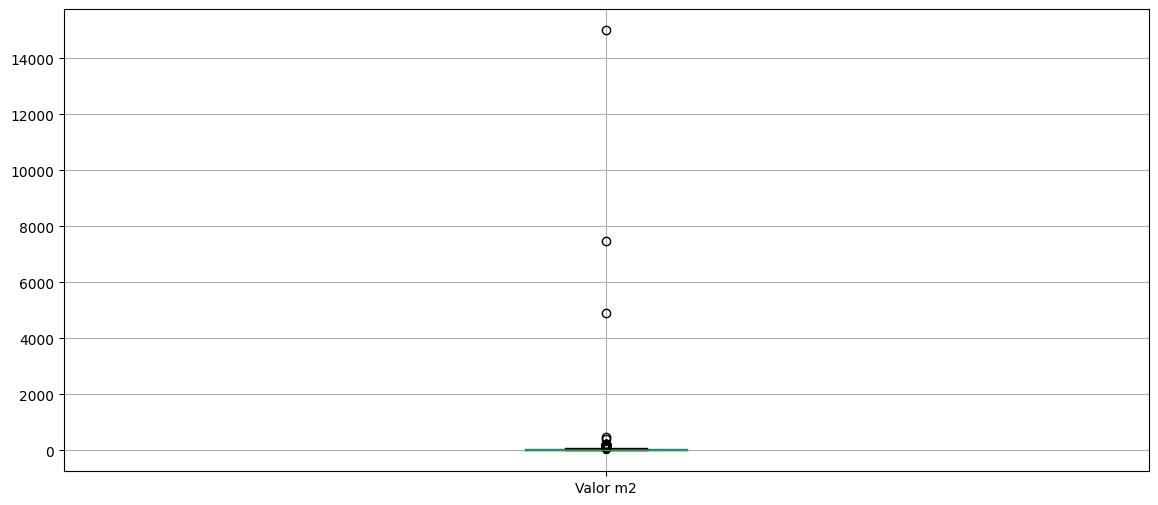

In [22]:
dados.boxplot(['Valor m2'])

In [23]:
valor = dados['Valor m2']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [24]:
d = {'Q1': Q1, 
     'Q3': Q3, 
     'IIQ': IIQ, 
     'Q1 - 1.5 * IIQ': (Q1 - 1.5 * IIQ),
     'Q3 + 1.5 * IIQ': (Q3 + 1.5 * IIQ)
    }
d

{'Q1': 21.25,
 'Q3': 42.31,
 'IIQ': 21.060000000000002,
 'Q1 - 1.5 * IIQ': -10.340000000000003,
 'Q3 + 1.5 * IIQ': 73.9}

In [25]:
for l, v in d.items():
    print('[{}] -> {:.2f}'.format(l, v))

[Q1] -> 21.25
[Q3] -> 42.31
[IIQ] -> 21.06
[Q1 - 1.5 * IIQ] -> -10.34
[Q3 + 1.5 * IIQ] -> 73.90


## A biblioteca matplotlib

Text(0.5, 1.0, 'Média de Imóveis por Tipo')

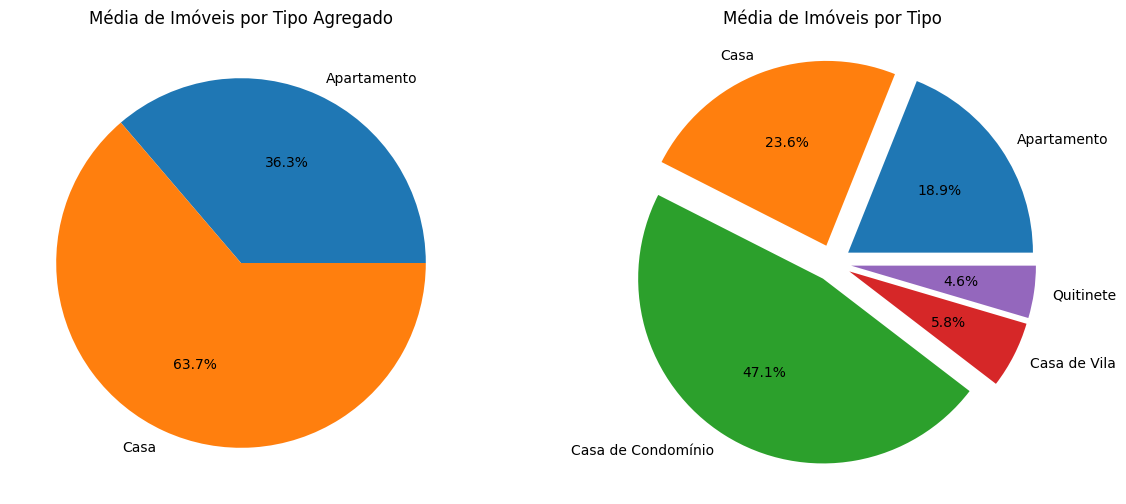

In [26]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.mean().index
valores = grupo1.mean().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Média de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.mean().index
valores = grupo2.mean().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Média de Imóveis por Tipo')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

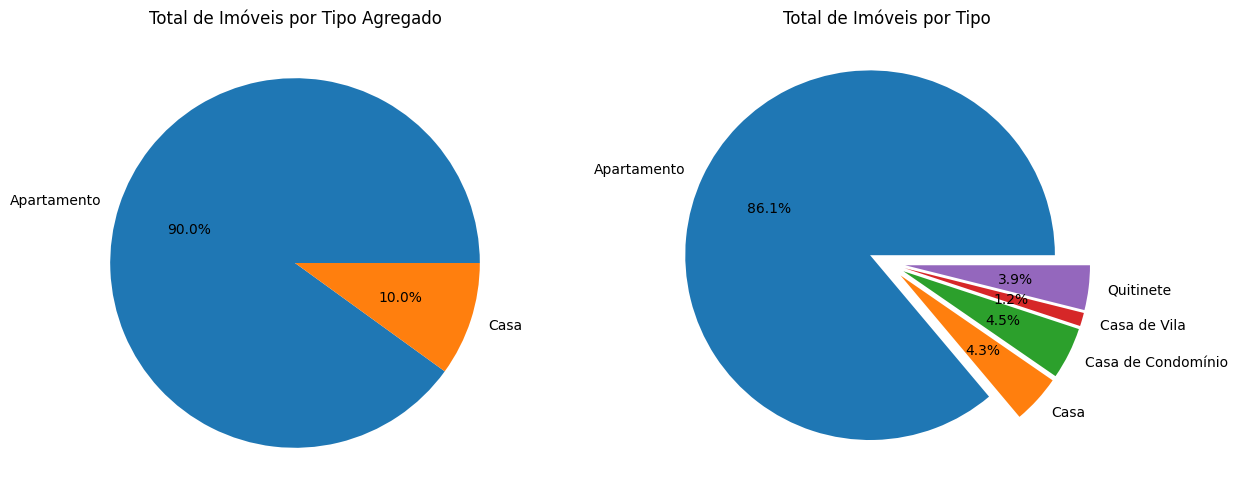

In [27]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')